# Ham or Spam-Gerçek Mesaj veya Reklam/İstenmeyen Mesajı

In [1]:
#pip install wordcloud

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("spam.csv", encoding="latin-1")
# latin-1 i desteklenmeyen karakterleri de desteklemesi için yazdık

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [8]:
df.columns=["Class","Text"]

In [9]:
df

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

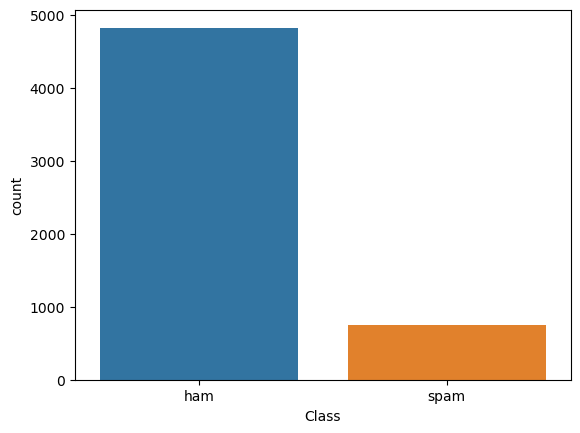

In [11]:
sns.countplot(x=df["Class"])

In [12]:
df["Class"].value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
d={"ham":0,"spam":1}

In [14]:
df.Class=df["Class"].map(d)

In [15]:
df

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
df["Text"]=df.Text.str.lower()

In [17]:
df["Text"]=df["Text"].str.replace('[^\w\s]','',regex=True)

In [18]:
df["Text"]=df["Text"].str.replace('\n','')

In [19]:
df["Text"]=df["Text"].str.replace('\d+','',regex=True)

In [20]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image #resimleri işlememizi sağlar
import numpy as np

In [25]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('resim.jpg'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

In [26]:
import matplotlib.pyplot as plt

In [27]:
ham=df[df["Class"]==0]["Text"]
spam=df[df["Class"]==1]["Text"]

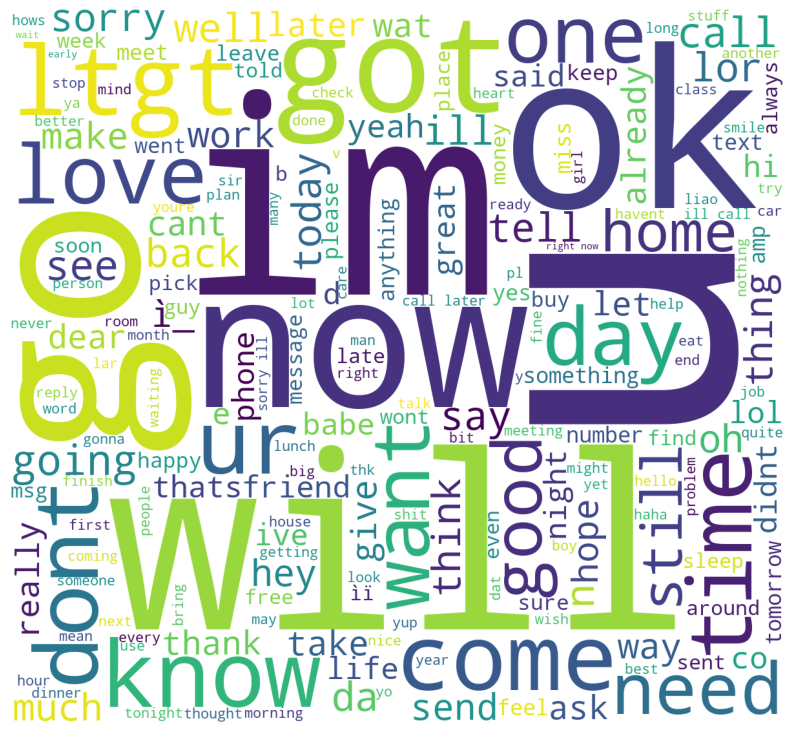

In [28]:
wc(ham,"white")

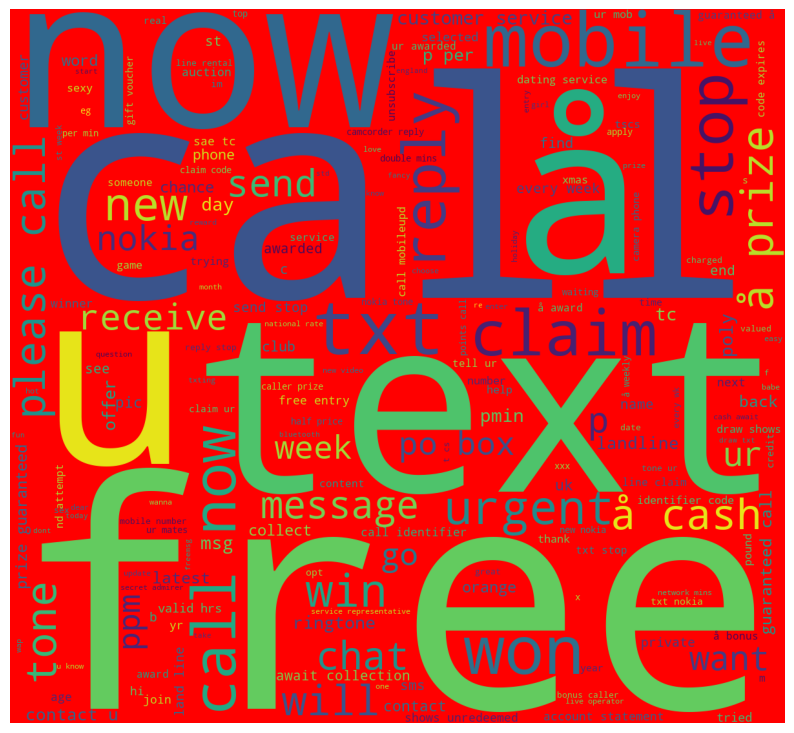

In [29]:
wc(spam,"red")

In [30]:
x=df["Text"]
y=df["Class"]

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [54]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [55]:
vect=CountVectorizer(stop_words="english",ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [56]:
x=vect.fit_transform(x)

In [57]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [58]:
nb=MultinomialNB()

In [59]:
model=nb.fit(x_train,y_train)

In [60]:
tahmin=model.predict(x_test)

In [62]:
accuracy_score(tahmin,y_test)

0.9766816143497757